In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.shape

(301, 9)

In [ ]:
df.describe().style.format(precision=3).background_gradient(cmap='BuGn')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.643,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


In [ ]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Drop the duplicated data  

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()
df.shape

(299, 9)

Statistical summary

In [ ]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette('cividis', as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Year,299.000000,2013.615385,2.896868,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,299.000000,4.589632,4.984240,0.100000,0.850000,3.510000,6.000000,35.000000
Present_Price,299.000000,7.541037,8.566332,0.320000,1.200000,6.100000,9.840000,92.600000
Driven_kms,299.000000,36916.752508,39015.170352,500.000000,15000.000000,32000.000000,48883.500000,500000.000000
Owner,299.000000,0.043478,0.248720,0.000000,0.000000,0.000000,0.000000,3.000000


EDA and Data Visualisation

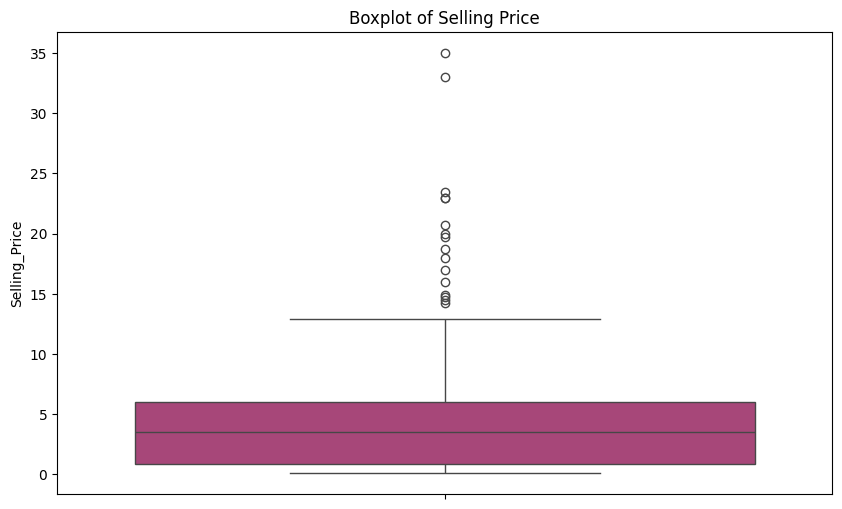

In [ ]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'],palette='magma')
plt.title('Boxplot of Selling Price')
plt.show()

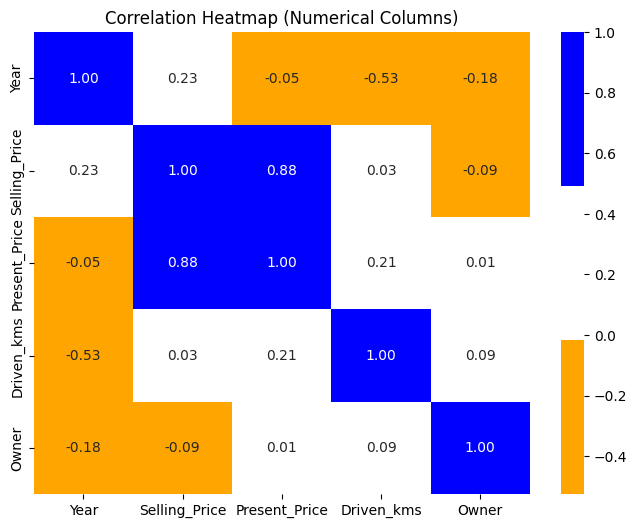

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
custom_palette = ['orange', 'white', 'blue']
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

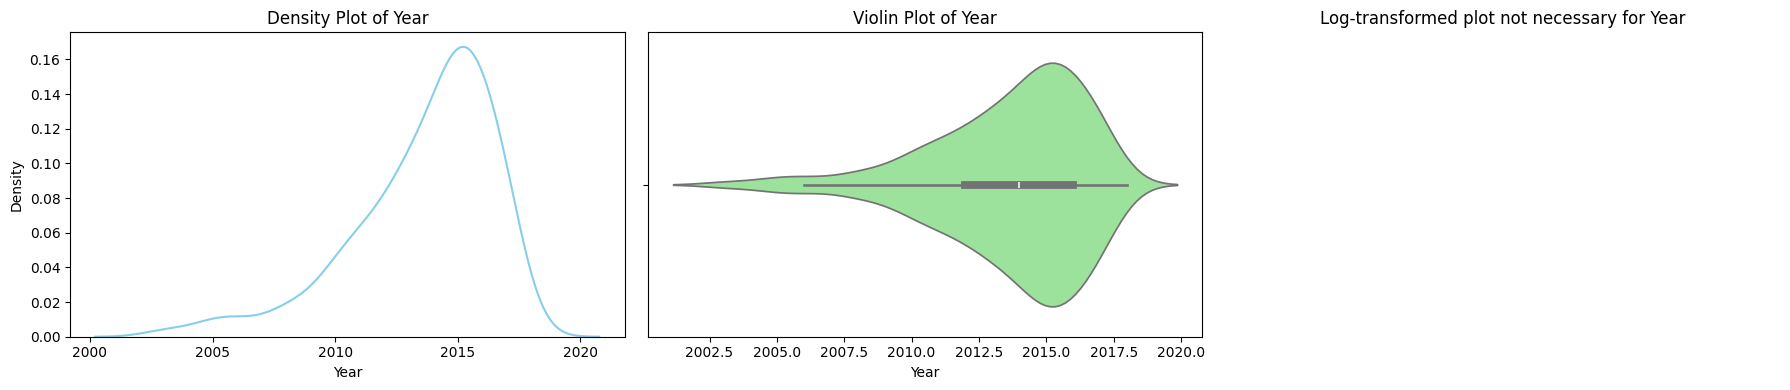

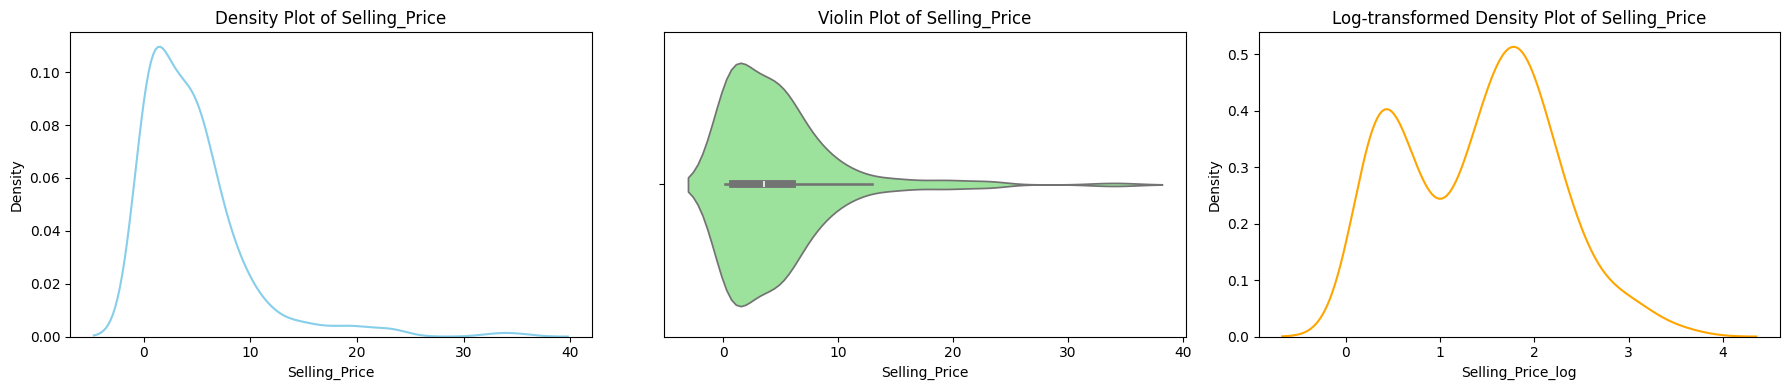

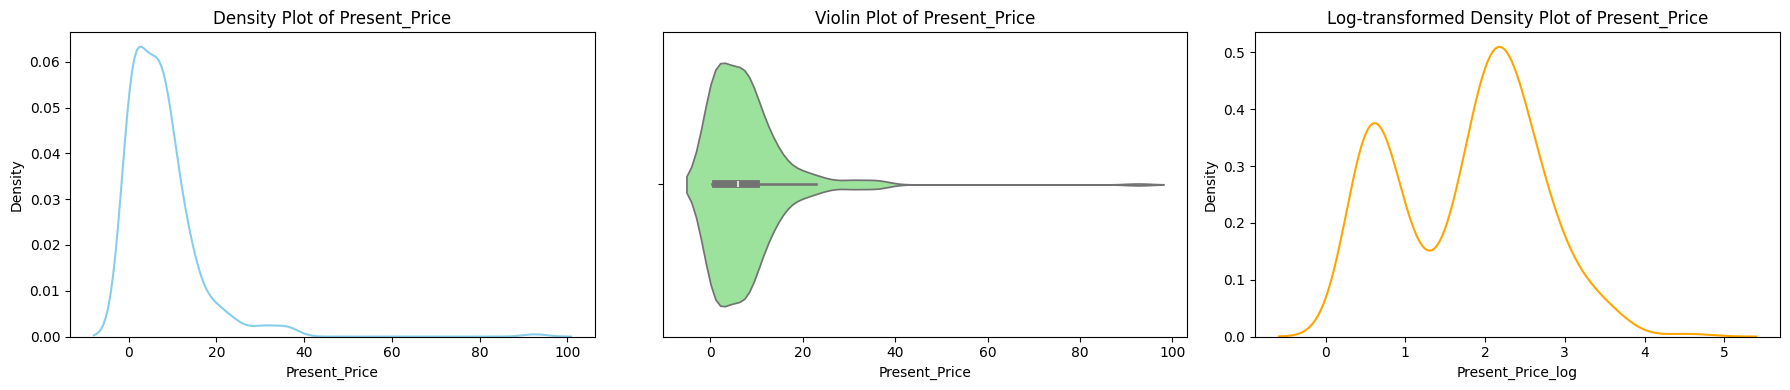

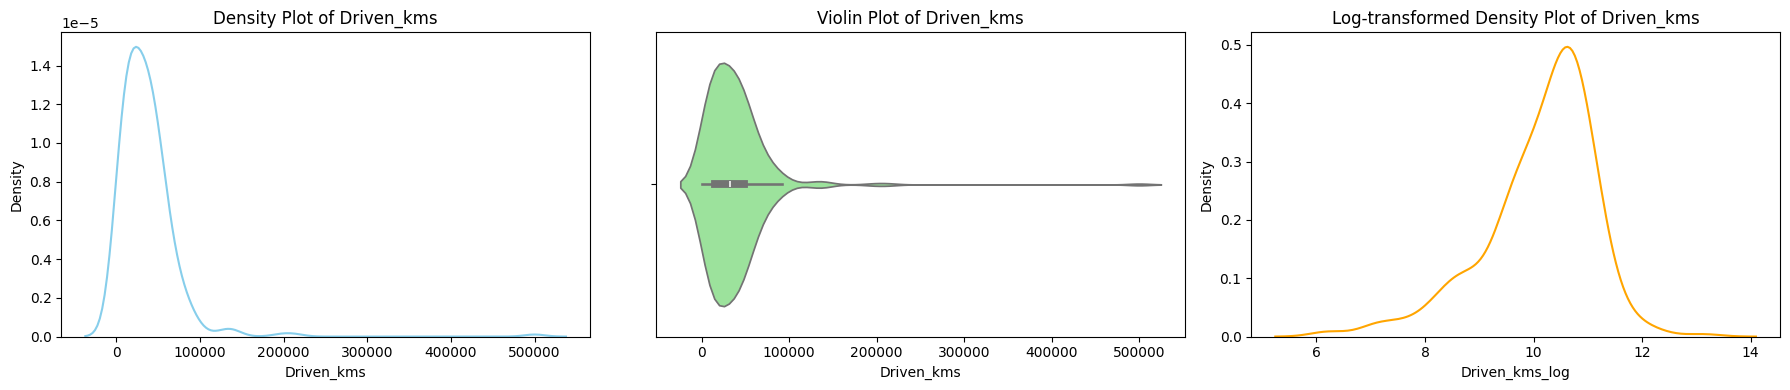

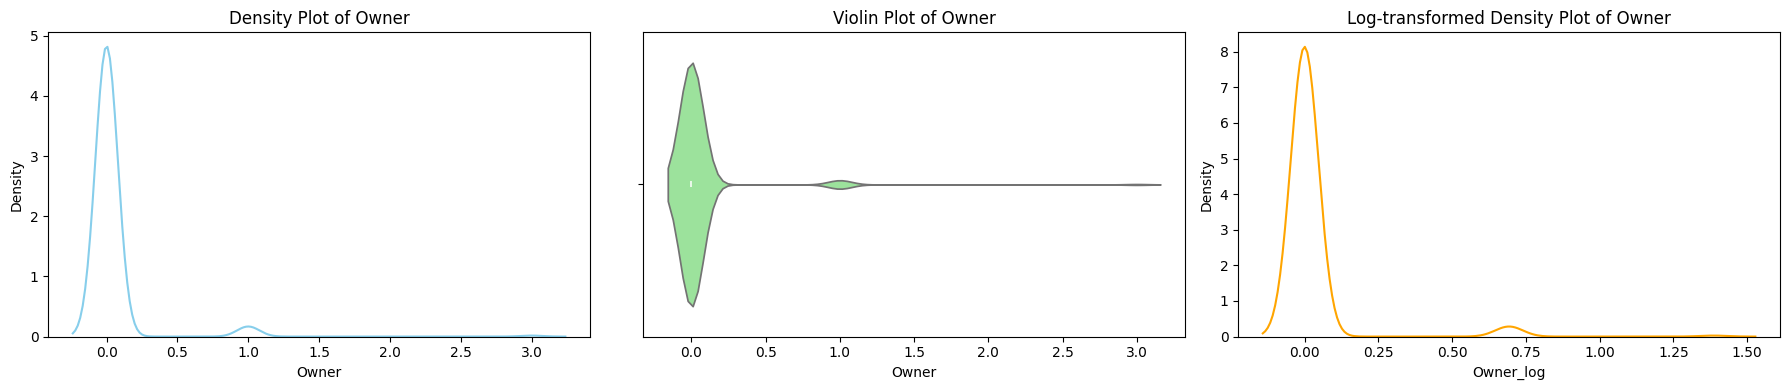

In [ ]:

for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    sns.kdeplot(df[column], color='skyblue', ax=ax1) #density plot
    ax1.set_title(f'Density Plot of {column}')
    ax1.set_ylabel('Density')

    sns.violinplot(x=df[column], color='lightgreen', ax=ax2)  # Violin plot
    ax2.set_title(f'Violin Plot of {column}')

    if df[column].skew() > 1:  # check for skewness
        df[column+'_log'] = np.log1p(df[column])
        sns.kdeplot(df[column+'_log'], color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Density Plot of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

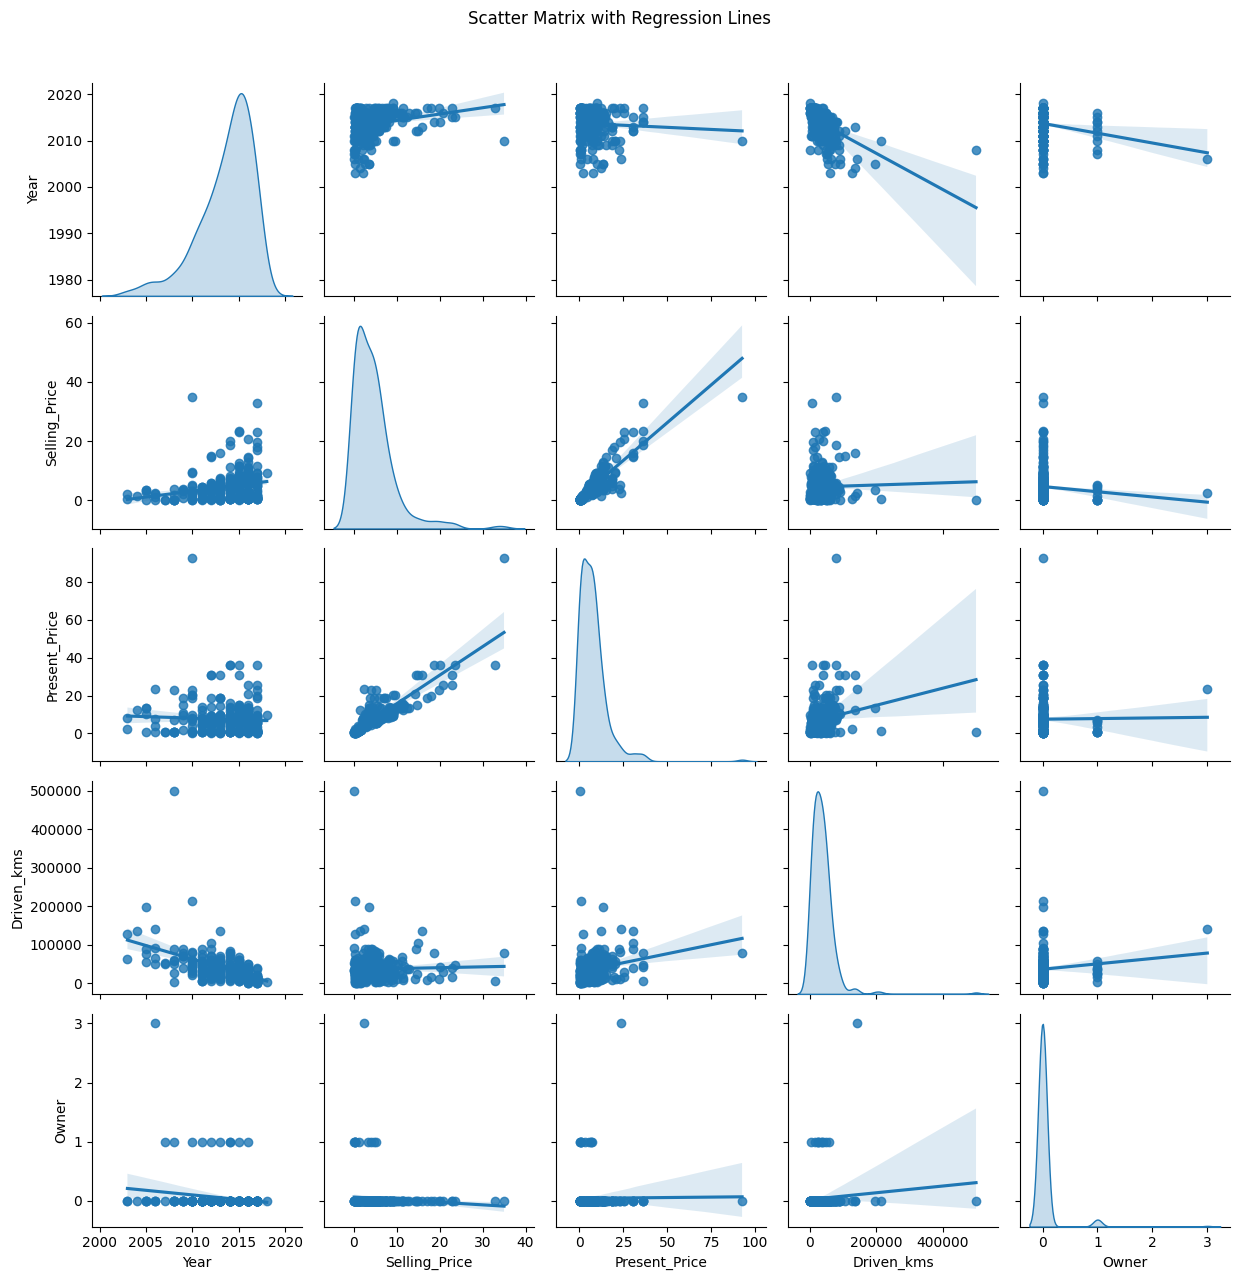

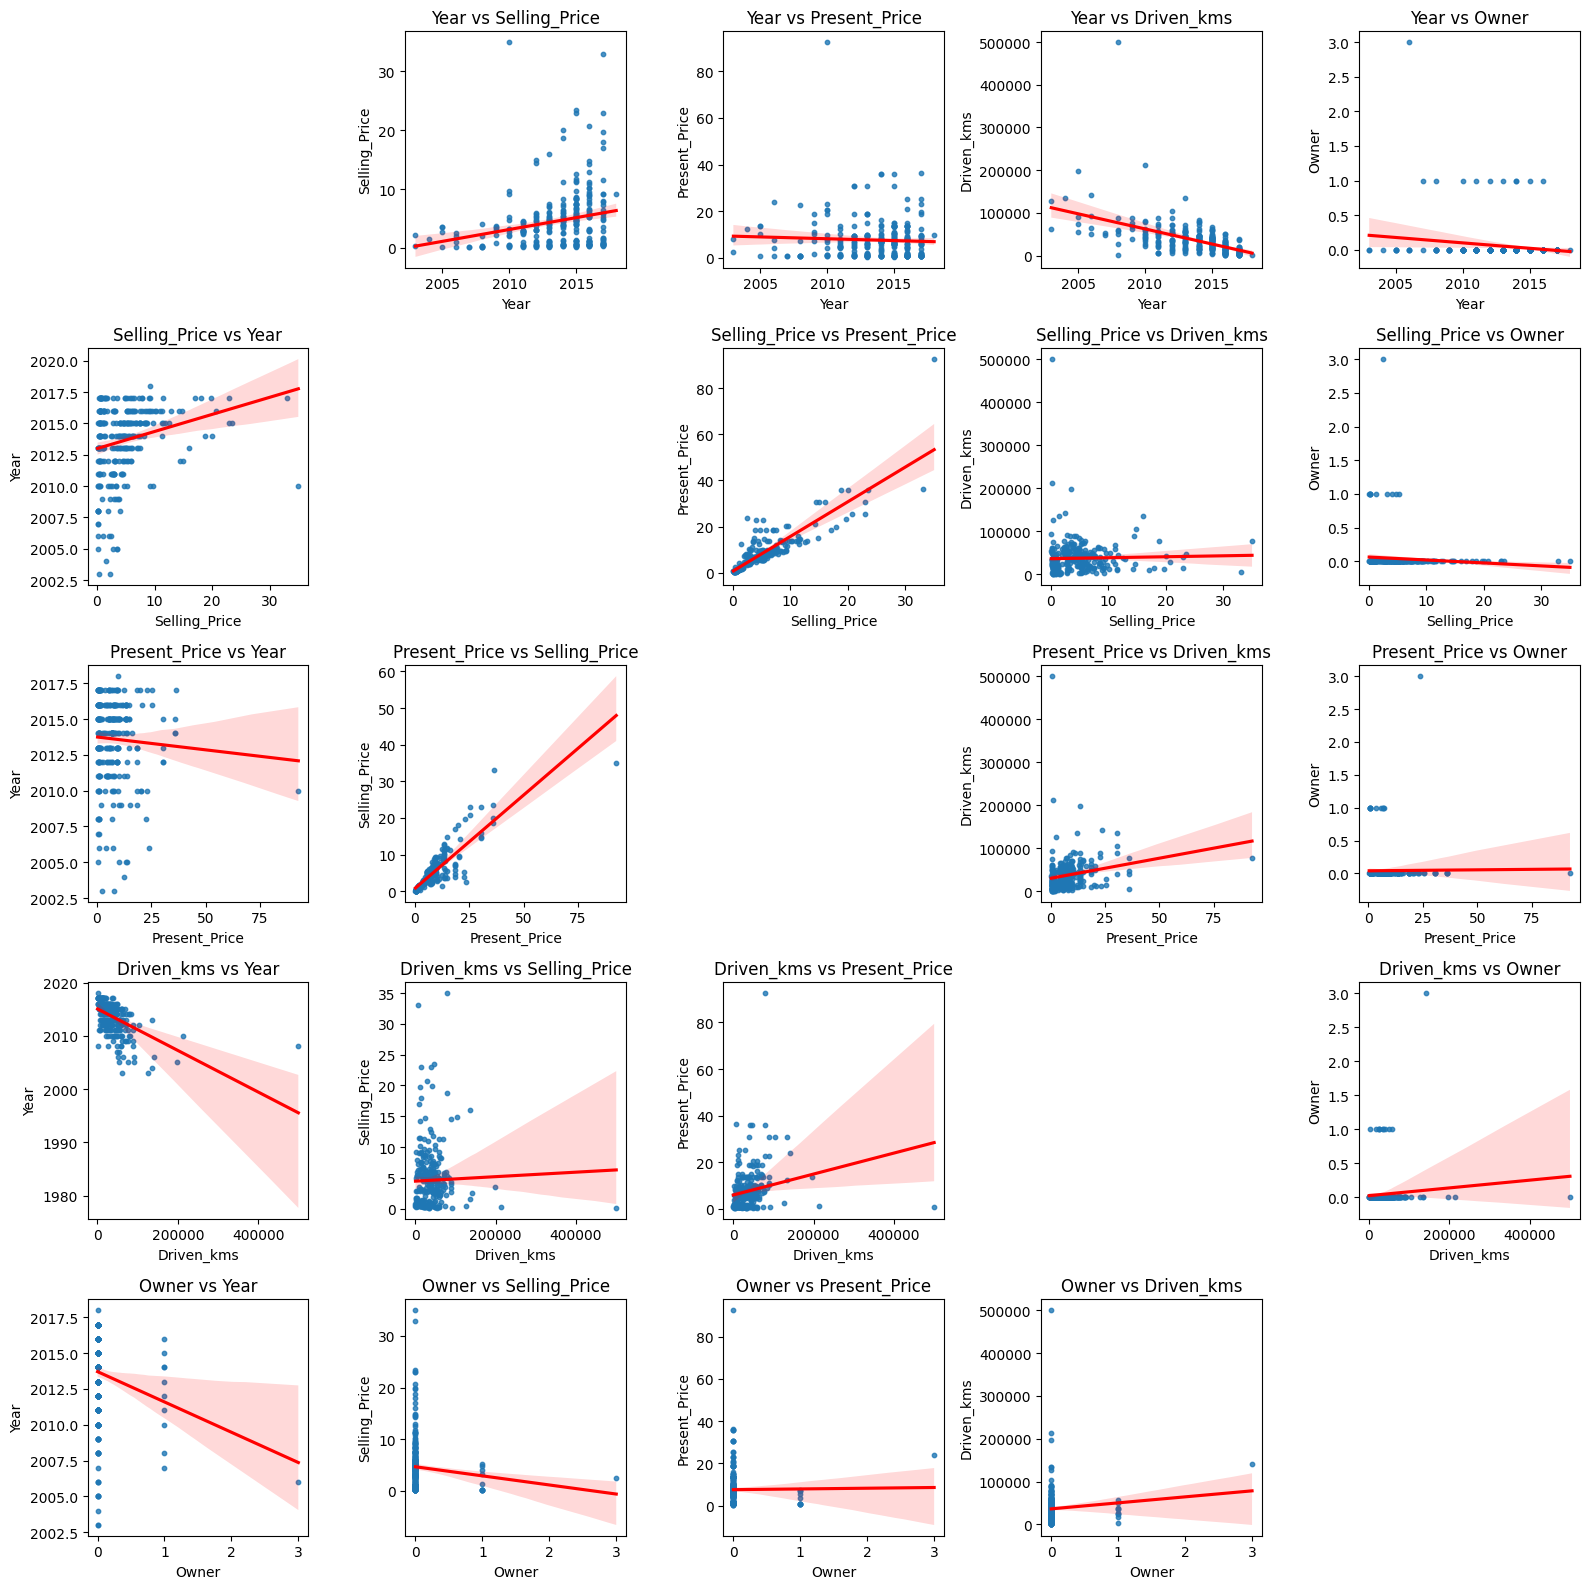

In [ ]:
def scatter_matrix_with_regression(df, numerical_columns):
    sns.pairplot(df[numerical_columns], kind='reg', diag_kind='kde')
    plt.suptitle('Scatter Matrix with Regression Lines', y=1.02)
    plt.tight_layout()
    plt.show()

def regression_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.regplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]], scatter_kws={'s': 10}, line_kws={'color': 'red'})
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()


scatter_matrix_with_regression(df, numerical_columns)
regression_plots(df, numerical_columns)

<Figure size 1000x600 with 0 Axes>

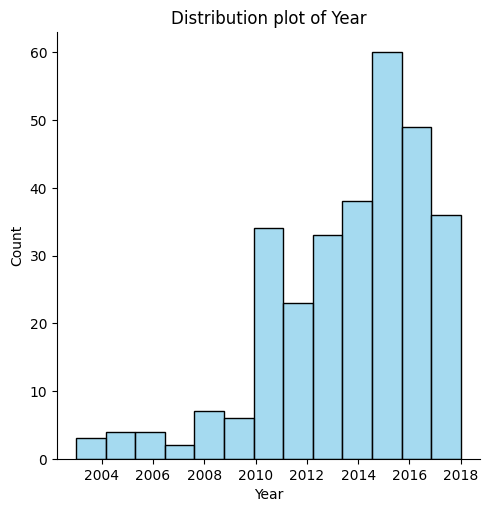

<Figure size 1000x600 with 0 Axes>

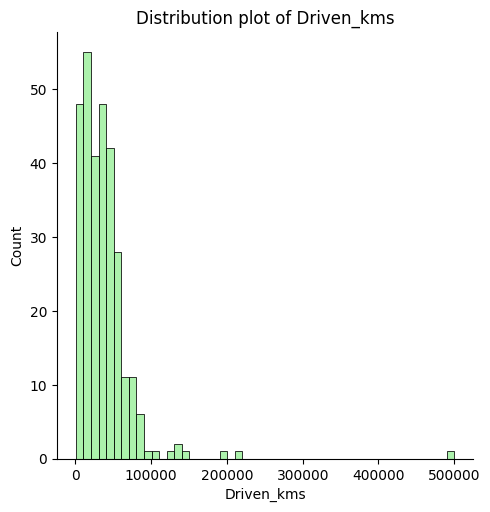

<Figure size 1000x600 with 0 Axes>

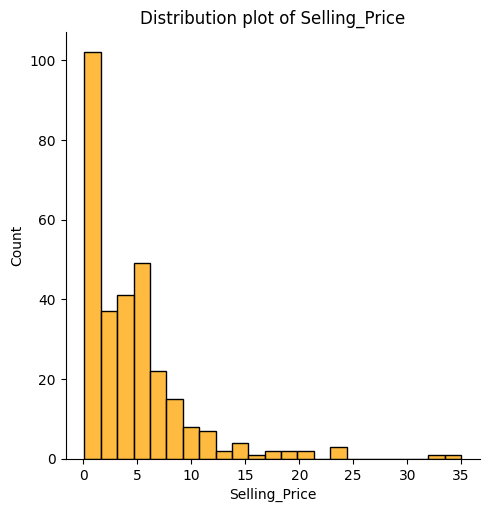

<Figure size 1000x600 with 0 Axes>

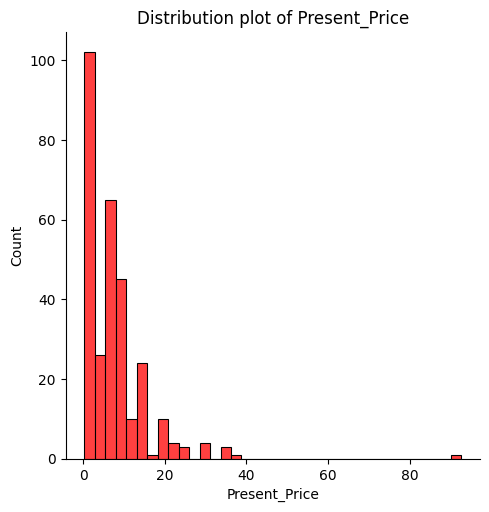

In [ ]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
colors = ["skyblue", "lightgreen", "orange", "red"]

# Create the bar plot with custom colors
for i, feature in enumerate(numerical_features):
    plt.figure(figsize=(10, 6))
    sns.displot(x=df[feature], color=colors[i])
    plt.title(f'Distribution plot of {feature}')
    plt.xlabel(feature)
    plt.show()

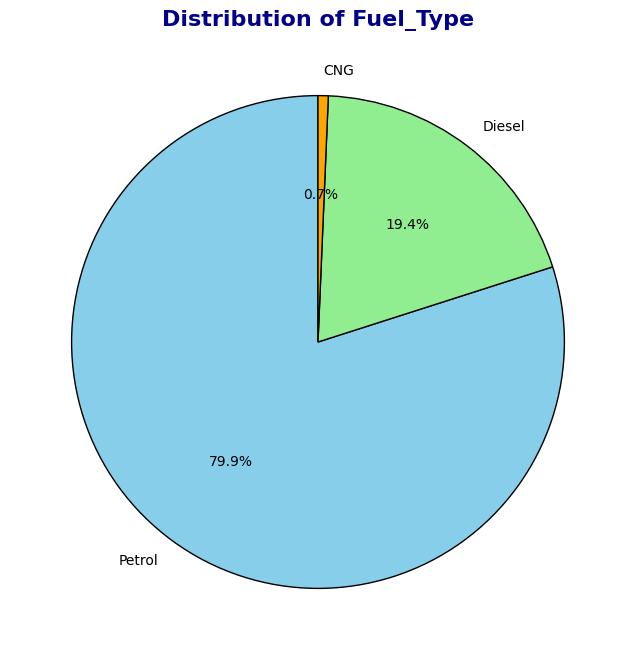

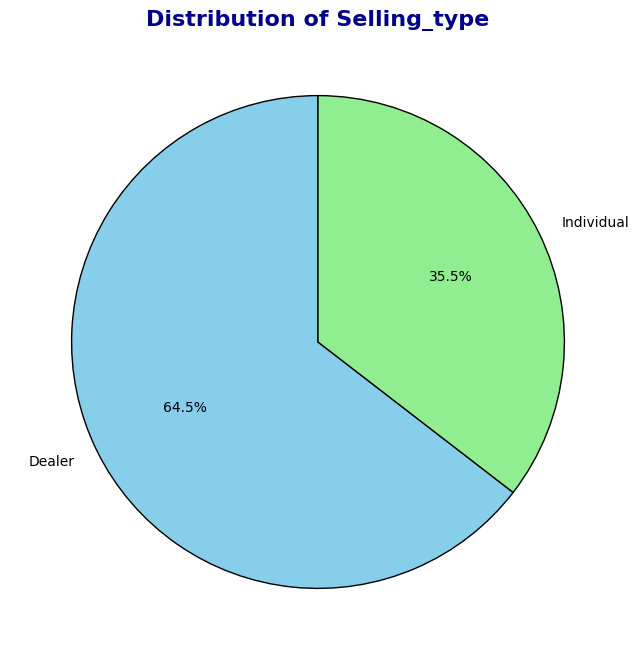

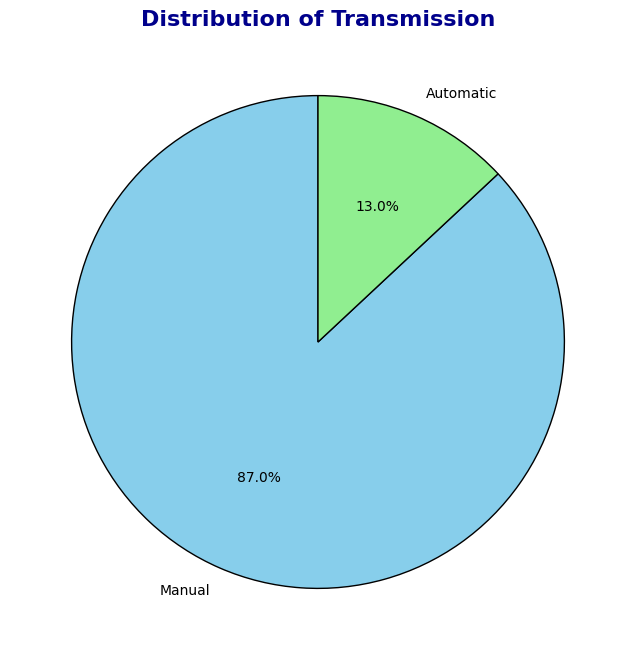

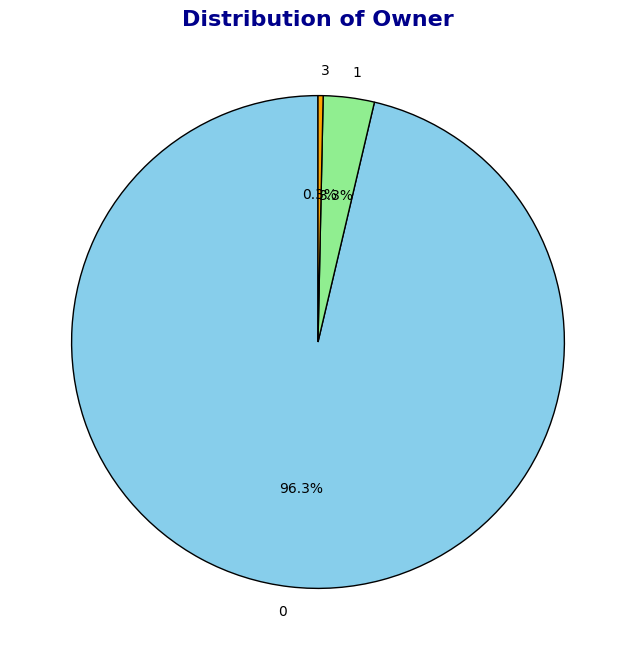

In [ ]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

# Pie Chart
for feature in categorical_features:
    plt.figure(figsize=(8, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Distribution of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.ylabel('')
    plt.show()


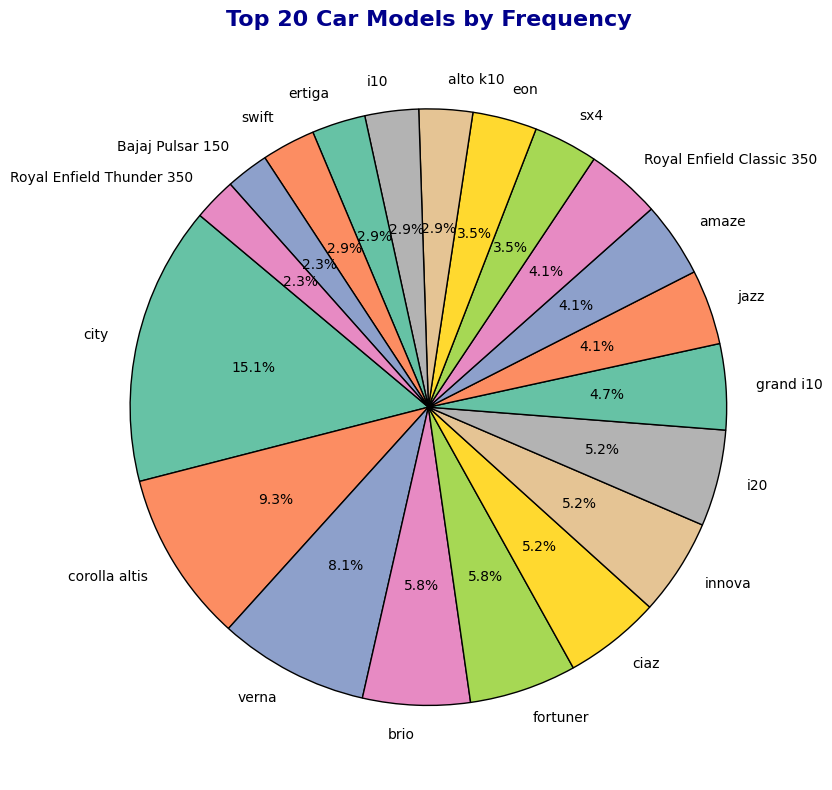

In [ ]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

# Pie Chart
plt.figure(figsize=(10, 8))
top_car_models.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"), wedgeprops={'edgecolor': 'black'})
plt.title(f'Top {n} Car Models by Frequency', fontsize=16, color='darkblue', fontweight='bold')
plt.ylabel('')  # Removing the y-label as it is not necessary for pie charts
plt.tight_layout()
plt.show()


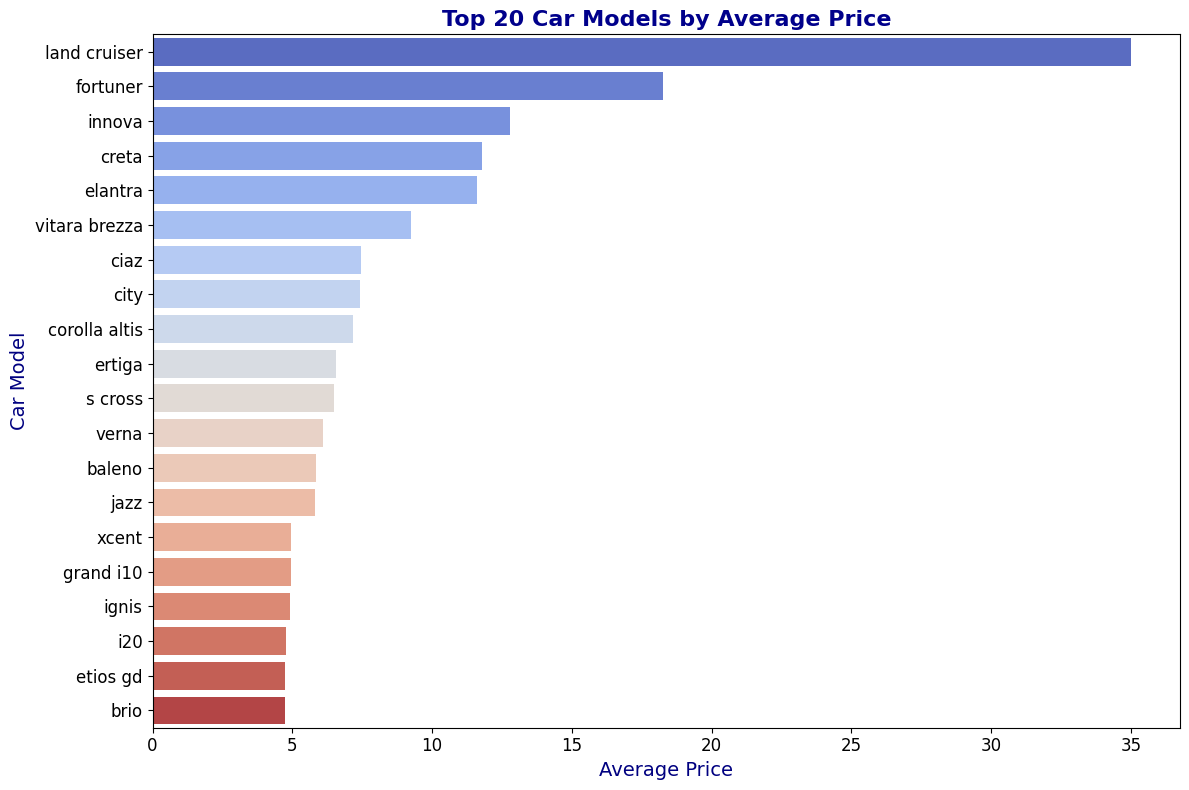

In [ ]:
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='coolwarm')
plt.title(f'Top {n} Car Models by Average Price', fontsize=16, color='darkblue', fontweight='bold')
plt.xlabel('Average Price', fontsize=14, color='navy')
plt.ylabel('Car Model', fontsize=14, color='navy')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Encode categorical features


In [ ]:
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log
0,ritz,2014,3.35,5.59,27000,0,0,0,0,1.470176,1.885553,10.203629,0.0
1,sx4,2013,4.75,9.54,43000,1,0,0,0,1.749200,2.355178,10.668979,0.0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2.110213,2.384165,8.839422,0.0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,1.348073,1.638997,8.556606,0.0
4,swift,2014,4.60,6.87,42450,1,0,0,0,1.722767,2.063058,10.656106,0.0


In [ ]:
y=df['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [ ]:
X = df.drop(['Selling_Price','Car_Name'],axis=1)
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log
0,2014,5.59,27000,0,0,0,0,1.470176,1.885553,10.203629,0.0
1,2013,9.54,43000,1,0,0,0,1.749200,2.355178,10.668979,0.0
2,2017,9.85,6900,0,0,0,0,2.110213,2.384165,8.839422,0.0
3,2011,4.15,5200,0,0,0,0,1.348073,1.638997,8.556606,0.0
4,2014,6.87,42450,1,0,0,0,1.722767,2.063058,10.656106,0.0
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,2.351375,2.533697,10.433792,0.0
297,2015,5.90,60000,0,0,0,0,1.609438,1.931521,11.002117,0.0
298,2009,11.00,87934,0,0,0,0,1.470176,2.484907,11.384353,0.0
299,2017,12.50,9000,1,0,0,0,2.525729,2.602690,9.105091,0.0


Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log
227,2011,4.430,57000,0,0,0,0,1.266948,1.691939,10.950824,0.0
79,2012,30.610,89000,1,0,1,0,2.740840,3.453474,11.396403,0.0
67,2010,20.450,59000,1,0,0,0,2.327278,3.065725,10.985310,0.0
298,2009,11.000,87934,0,0,0,0,1.470176,2.484907,11.384353,0.0
194,2008,0.787,50000,0,1,0,0,0.182322,0.580538,10.819798,0.0
...,...,...,...,...,...,...,...,...,...,...,...
190,2008,0.750,60000,0,1,0,0,0.182322,0.559616,11.002117,0.0
72,2013,18.610,56001,0,0,0,0,2.134166,2.976040,10.933143,0.0
108,2016,1.500,18000,0,1,0,0,0.788457,0.916291,9.798183,0.0
272,2015,10.000,27600,0,0,0,0,2.140066,2.397895,10.225607,0.0


In [ ]:
y_train

227     2.55
79     14.50
67      9.25
298     3.35
194     0.20
       ...  
190     0.20
72      7.45
108     1.20
272     7.50
104     1.35
Name: Selling_Price, Length: 224, dtype: float64

Training the model

Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training MSE: 0.37879508297874037
Testing MSE: 0.6144581040397522
Training R2 Score: 0.9850900062264933
Testing R2 Score: 0.9730646432863714


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training MSE: 0.31733035516690655
Testing MSE: 0.2626580143946577
Training R2 Score: 0.9875093584043466
Testing R2 Score: 0.9884861355641656


In [ ]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Decision Tree,2.063496e-35,1.259656,1.000000,0.944782
1,Random Forest,1.073390e-01,1.020173,0.995775,0.955280


In [ ]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
}
for name, model in models.items():
    model.fit(X_train, y_train)

new_data = [[2022, 20000, 0, 1, 1, 0, 0,1,0,0,1]]
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(new_data)

for name, preds in predictions.items():
    print(f"Predictions using {name}: {preds}")

Predictions using Decision Tree: [1.75]
Predictions using Random Forest: [2.1995]
